# **Objective of the Task**  
Sample data contains sales data over the last two months:  
"Do a Complete analysis and provide a detailed report with as many insights as possible."


# **Importing libraries**

In [48]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# **Reading the file**

In [49]:
df = pd.read_excel("/content/Data Analyst Task (4).xls")
df.head()

,User ID,Product Code,Payment Status,Coupon code,Lead Registered Time,Sales Date,Source,Product Amount with GST,Payment Mode,Currency Code,Transaction Bank
0,user1,Product1,Initiated,NaN,2022-08-01 04:55:00,2022-07-31,Direct,3999.0,NaN,INR,NaN
1,user2,Product2,Initiated,NaN,2022-08-01 04:46:00,2022-07-31,Direct,999.0,NaN,INR,NaN
2,user4,Product3,Initiated,NaN,2022-08-01 03:21:00,2022-07-31,Direct,1999.0,NaN,INR,NaN
3,user6,Product3,Initiated,NaN,2022-08-01 00:56:00,2022-07-31,Direct,1999.0,NaN,INR,NaN
4,user8,Product4,Initiated,NaN,2022-08-01 00:46:00,2022-07-31,Direct,2022.0,NaN,INR,NaN


# **EDA**

In [50]:
df.shape

(9514, 11)

In [51]:
df.describe()

,Product Amount with GST
count,9513.000000
mean,1464.982533
std,1277.535383
min,4.680000
25%,499.000000
50%,1499.000000
75%,1999.000000
max,29992.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9514 entries, 0 to 9513
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User ID                  9514 non-null   object        
 1   Product Code             9514 non-null   object        
 2   Payment Status           9514 non-null   object        
 3   Coupon code              662 non-null    object        
 4   Lead Registered Time     9514 non-null   datetime64[ns]
 5   Sales Date               9514 non-null   datetime64[ns]
 6   Source                   9514 non-null   object        
 7   Product Amount with GST  9513 non-null   float64       
 8   Payment Mode             1730 non-null   object        
 9   Currency  Code           9514 non-null   object        
 10  Transaction Bank         92 non-null     object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 817.7+ KB


In [53]:
df.isnull().sum()

User ID                       0
Product Code                  0
Payment Status                0
Coupon code                8852
Lead Registered Time          0
Sales Date                    0
Source                        0
Product Amount with GST       1
Payment Mode               7784
Currency  Code                0
Transaction Bank           9422
dtype: int64

## **Treating the null values**

In [54]:
df['Coupon code'] = df['Coupon code'].replace(np.NaN, 'Coupon unknown')

In [55]:
df['Payment Mode'] = df['Payment Mode'].replace(np.NaN, 'Payment Mode unknown')

In [56]:
df['Transaction Bank'] = df['Transaction Bank'].replace(np.NaN, 'Bank unknown')

In [57]:
df = df.dropna(subset=['Product Amount with GST'])

In [58]:
df.isnull().sum()

User ID                    0
Product Code               0
Payment Status             0
Coupon code                0
Lead Registered Time       0
Sales Date                 0
Source                     0
Product Amount with GST    0
Payment Mode               0
Currency  Code             0
Transaction Bank           0
dtype: int64

## **saving the dataframe**

In [59]:
df.to_csv('Guvi_Data_Analyst.csv')

## **Getting Insights**

### **1.Sales trends**  
Analyzing the 'Sales Date' column to identify sales trends over the past two months. This will help to understand which days of the week or times of the month generate the most sales.

In [85]:
df['Product Amount with GST'].max()

29992.0

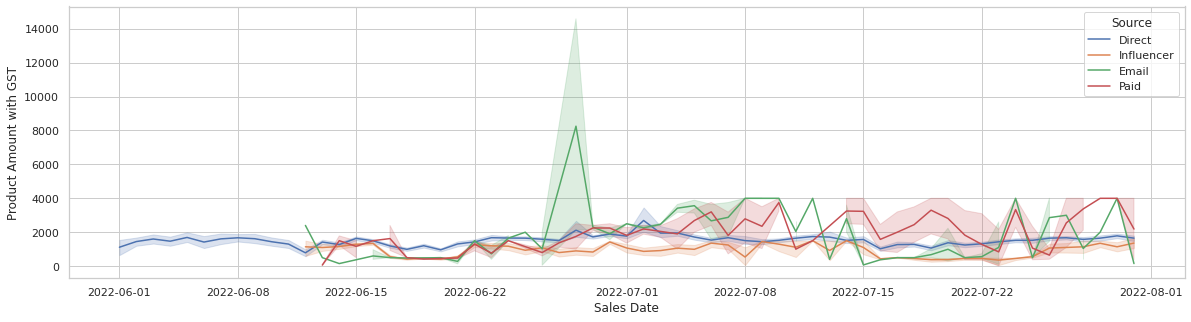

In [60]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Sales Date', y='Product Amount with GST',hue='Source', data=df)
plt.show()

In [61]:
daily_sales = df.groupby(pd.Grouper(key='Sales Date', freq='D'))['Product Amount with GST'].sum()

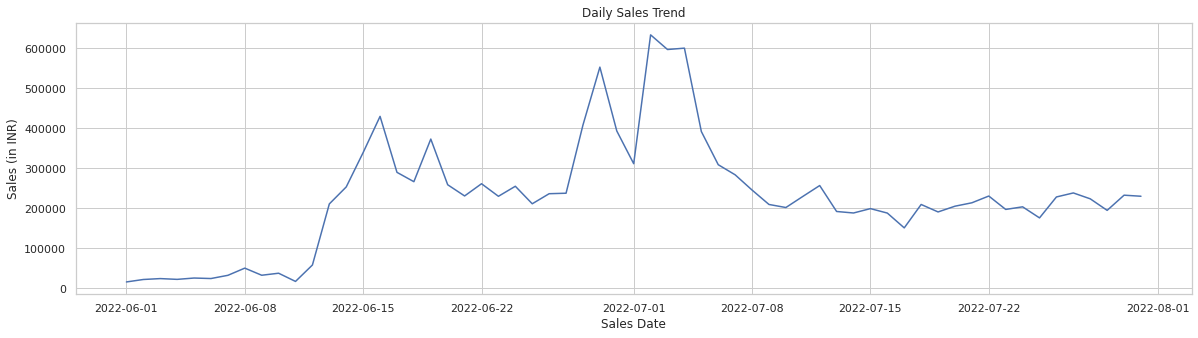

In [62]:
plt.figure(figsize=(20,5))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.ylabel("Sales (in INR)")
plt.title("Daily Sales Trend")
plt.show()

In [63]:
df['Sales Date'] = pd.to_datetime(df['Sales Date'])

In [64]:
sales_by_week = df.groupby(df['Sales Date'].dt.week)['Product Amount with GST'].sum()

<ipython-input-64-6234d1ea3ac0>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  sales_by_week = df.groupby(df['Sales Date'].dt.week)['Product Amount with GST'].sum()


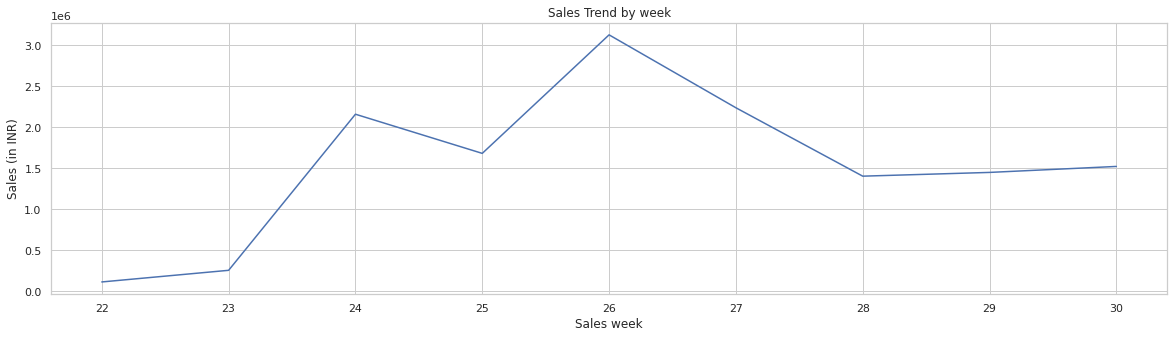

In [65]:
plt.figure(figsize=(20,5))
sns.lineplot(x=sales_by_week.index, y=sales_by_week.values)
plt.xlabel("Sales week")
plt.ylabel("Sales (in INR)")
plt.title("Sales Trend by week")
plt.show()

### **2. Product performance**  
By looking at the 'Product Code' and 'Product Amount with GST' columns, we can identify which products are performing well and generating the most revenue. This will help us to make informed decisions about which products to prioritize and which to potentially discontinue.

In [66]:
product_sales = df.groupby('Product Code')['Product Amount with GST'].sum().sort_values(ascending=False)[:20]

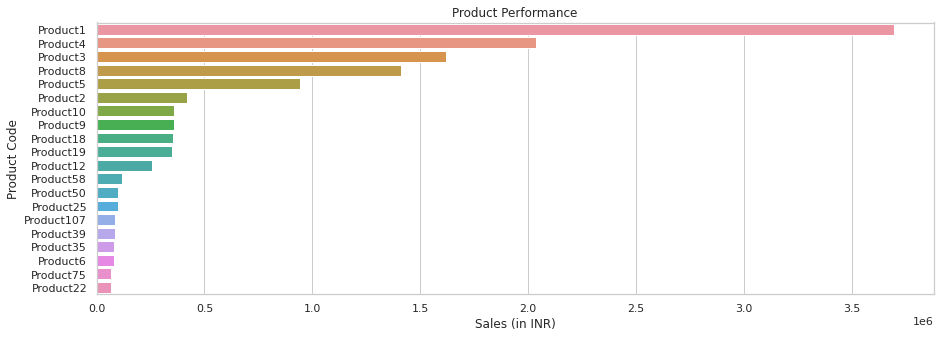

In [67]:
plt.figure(figsize=(15,5))
sns.barplot(x=product_sales.values, y=product_sales.index)
plt.xlabel("Sales (in INR)")
plt.title("Product Performance")
plt.show()

**Top 5 Trending products over 2 Months**

In [115]:
# Select the top 5 products by sales amount:
top_5_products = product_sales.head(5).index

In [116]:
# Group the data by "Product Code" and "Sales Date" for the top 10 products:
sales_by_top_products = df[df['Product Code'].isin(top_5_products)].groupby(
    ['Product Code', df['Sales Date'].dt.to_period('D')])['Product Amount with GST'].sum()

In [117]:
# Reshape the data to a pivot table format
sales_by_top_products = sales_by_top_products.unstack(level=0)

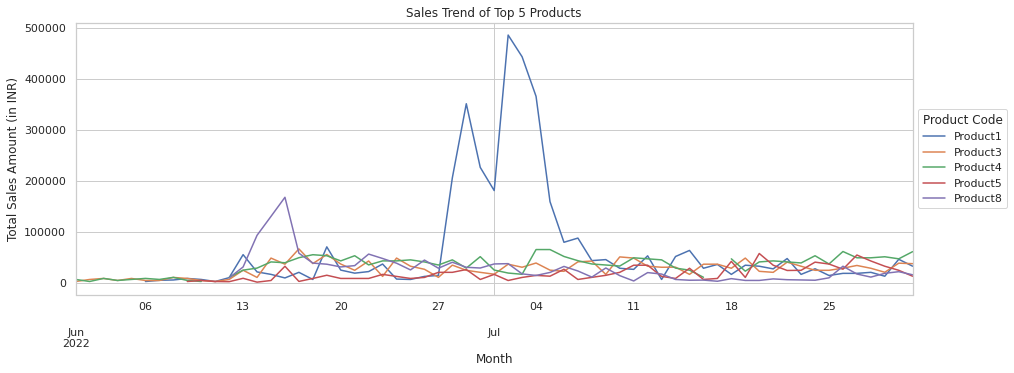

In [118]:
sales_by_top_products.plot(kind='line', figsize=(15,5))
plt.title('Sales Trend of Top 5 Products')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount (in INR)')
plt.legend(title='Product Code', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### **3.Payment mode preference**  
we can analyze the 'Payment Mode' column to understand which payment methods customers prefer. This can helpful to optimize payment options to better meet customer needs and preferences.

In [68]:
df['Payment Mode'].value_counts()

Payment Mode unknown    7783
upi                     1209
card                     287
netbanking                90
paylater                  69
wallet                    58
cardless_emi              15
emi                        2
Name: Payment Mode, dtype: int64

In [69]:
payment_sales = df.groupby('Payment Mode')['Product Amount with GST'].sum().sort_values(ascending=False)

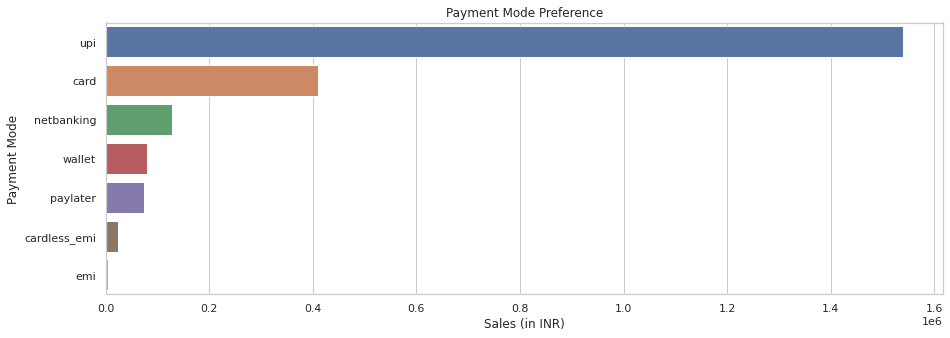

In [72]:
plt.figure(figsize=(15,5))
sns.barplot(x=payment_sales.values[1:], y=payment_sales.index[1:]) # neglecting the value 'Payment Mode unknown'
plt.xlabel("Sales (in INR)")
plt.title("Payment Mode Preference")
plt.show()

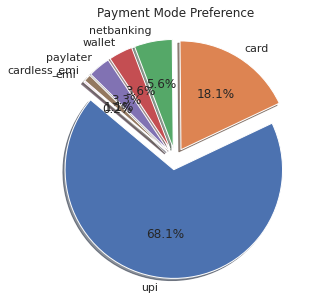

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(payment_sales.values[1:], labels=payment_sales.index[1:], autopct='%1.1f%%', explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1], shadow=True, startangle=140)
ax.set_title('Payment Mode Preference')
plt.show()

### **4.Lead conversion rates**  
By comparing the 'Lead Registered Time' and 'Sales Date' columns, you can calculate lead conversion rates to understand how long it takes on average for a lead to convert to a sale. This will help to optimize lead generation and follow-up processes to improve conversion rates.

**What is a lead time in sales?**  
The customer lead time is 
* the amount of time between when a customer places an order and when the customer receives the product.
* the time between when a customer places an online order and the company receives the order confirmation.

**Let's assume the first point is our Scenario.**

In [74]:
# Group the data by date and count the number of leads registered on each day
leads_by_date = df.groupby(df['Lead Registered Time'].dt.date)['User ID'].nunique()

# Group the data by date and count the number of sales made on each day
sales_by_date = df.groupby('Sales Date')['User ID'].nunique()

# Calculate the lead conversion rate for each day
conversion_rates = sales_by_date / leads_by_date

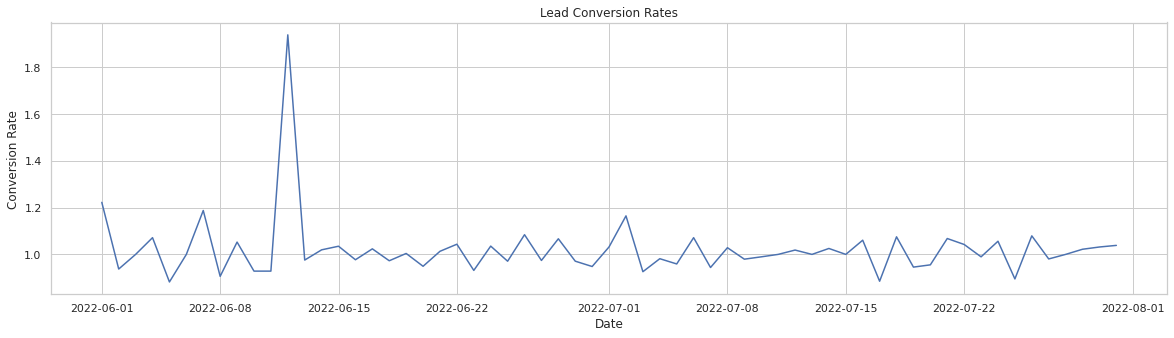

In [75]:
plt.figure(figsize=(20,5))
sns.lineplot(x=conversion_rates.index, y=conversion_rates.values)
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.title("Lead Conversion Rates")
plt.show()

### **5.Coupon code usage**
By analyzing the 'Coupon code' column, we can understand how frequently customers are using coupons and which types of coupons are most popular. This will help us to optimize coupon offerings to better meet customer needs and incentivize sales.

In [76]:
df['Coupon code'].value_counts()

Coupon unknown    8852
Coupon1            234
Coupon9            100
Coupon26            64
Coupon3             49
                  ... 
Coupon58             1
Coupon20             1
Coupon60             1
Coupon61             1
Coupon94             1
Name: Coupon code, Length: 94, dtype: int64

In [77]:
# Group the data by coupon code and count the number of times each coupon code was used
coupon_usage = df.groupby('Coupon code')['User ID'].nunique().sort_values(ascending=False)

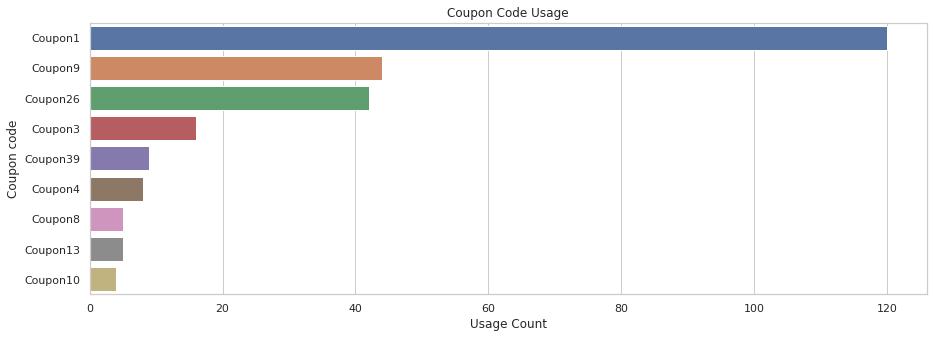

In [78]:
plt.figure(figsize=(15,5))
sns.barplot(x=coupon_usage.values[1:10], y=coupon_usage.index[1:10])
plt.xlabel("Usage Count")
plt.title("Coupon Code Usage")
plt.show()

### **6.Payment processing performance**  
The 'Payment Status' and 'Transaction Bank' columns can be help to monitor the performance of payment processing systems and identify any issues or errors that may be impacting sales.

**What is a lead time in sales?**  
The customer lead time is 
* the amount of time between when a customer places an order and when the customer receives the product.
* the time between when a customer places an online order and the company receives the order confirmation.

**Let's assume the Second point is our Scenario.**

In [79]:
df['Transaction Bank'].value_counts()

Bank unknown    9421
HDFC              29
ICIC              17
SBIN              17
CIUB               8
YESB               5
IDIB               4
IOBA               4
KKBK               3
UBIN               1
HSBC               1
CNRB               1
INDB               1
TMBL               1
Name: Transaction Bank, dtype: int64

In [121]:
processing_time = df.groupby('Transaction Bank')['Sales Date', 'Lead Registered Time'].apply(
    lambda x: (x['Lead Registered Time']- x['Sales Date']).mean().total_seconds() / 60)

<ipython-input-121-7ef3fbb35df5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  processing_time = df.groupby('Transaction Bank')['Sales Date', 'Lead Registered Time'].apply(


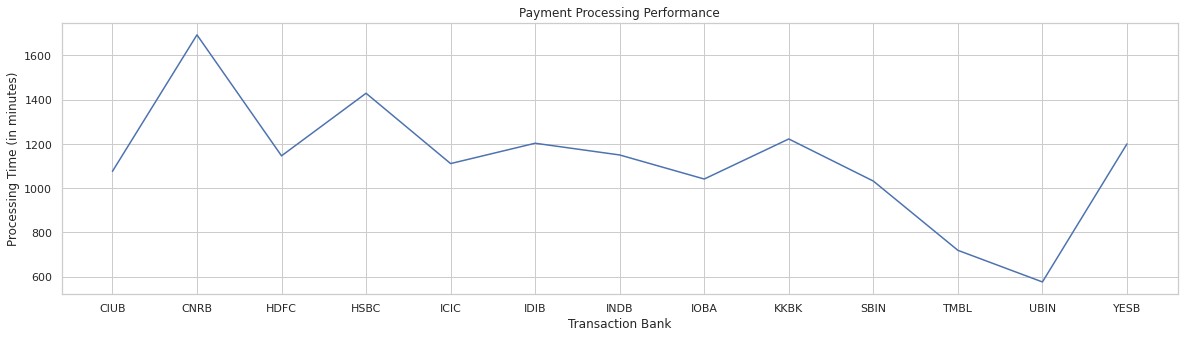

In [122]:
plt.figure(figsize=(20,5))
sns.lineplot(x=processing_time.index[1:], y=processing_time.values[1:])
plt.xlabel("Transaction Bank")
plt.ylabel("Processing Time (in minutes)")
plt.title("Payment Processing Performance")
plt.show()

### **7.Marketing channel effectiveness**
The 'Source' column will help to understand which marketing channels are driving the most sales. This can be helpful to optimize marketing efforts to focus on the channels that are most effective for business.

In [82]:
# Group the data by marketing channel and calculate the total sales amount for each channel
sales_by_channel = df.groupby('Source')['Product Amount with GST'].sum().sort_values(ascending=False)

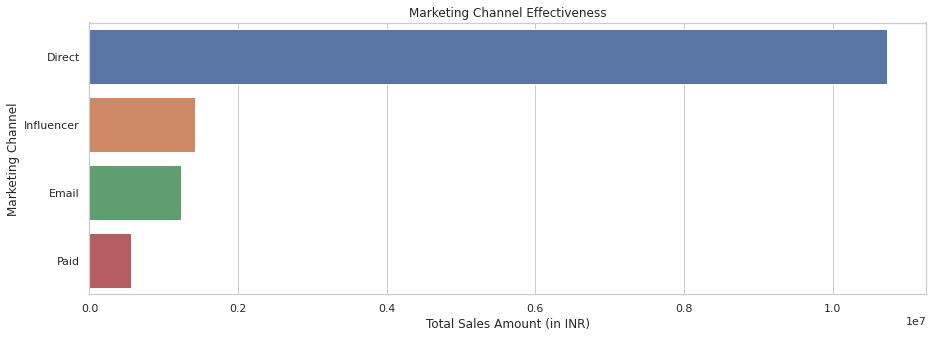

In [83]:
plt.figure(figsize=(15,5))
sns.barplot(x=sales_by_channel.values, y=sales_by_channel.index)
plt.xlabel("Total Sales Amount (in INR)")
plt.ylabel('Marketing Channel')
plt.title("Marketing Channel Effectiveness")
plt.show()

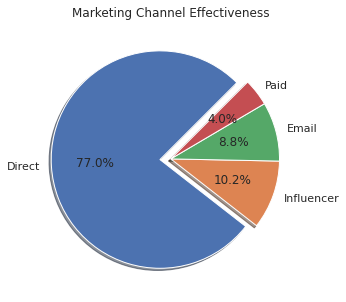

In [84]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(sales_by_channel.values, labels=sales_by_channel.index, autopct='%1.1f%%',  explode=[0.1,0,0,0], shadow=True, startangle=45)
ax.set_title('Marketing Channel Effectiveness')
plt.show()

**Overall sales**

In [123]:
df['Product Amount with GST'].sum()

13936378.84

## **Summary of the Insights**

**1.Sales trends**  
> * The sales was gradually increased in the middle of 2nd week, June 2022.  
* And started to drop in the middle of 1st week July 2022.  
*   It increased because of the new sources like (Influencer, Email, Paid) before that there was only one source (Direct).
* Even though the sales was dropped in the middle of 1st week, July 2022.The average sales margin was higher than the June Month.

**2. Product performance**  
> * (Product1,Product4,Product3,Product8) has crossed the total sales of more than 10lakhs. 
* Product1 has a huge reach from 27 Jun to 4th July.  


**3.Payment mode preference**  
> * Apart from 7783 - 'Unknown Payment Mode',Users were mostly prefering 'Upi' and 'card' Transaction.

**4.Lead conversion rates**  
> * Lead conversion time was quite higher in the middle of 2nd week, June 2022.
which may happened due to sudden increase of sales. 

**5.Coupon code usage**  
> * Apart 8852 'unknown Coupon Status',(Coupon1, Coupon9, Coupon26) have the more usage counts

**6.Payment processing performance**  
> * From the graph we can see that the "CNRB" bank takes more processing time and "UBIN" bank takes the less processing time. Apart from the 9421 'Unknown Bank' values. 

**7.Marketing channel effectiveness**  
> * "Direct" source was driving the most sales in the given Two Months.
* The source (influence,Email,Paid) have played a significant role in increasing the sales.  

**overall sales is 1.39 Crores**